In [1]:
import keras,os
import numpy as np
import tensorflow as tf
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPooling2D, GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications import InceptionV3

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_ds='/content/drive/MyDrive/Data_100/traing'
val_ds='/content/drive/MyDrive/Data_100/validation'

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Load training and validation data
train_data_dir = train_datagen.flow_from_directory(
    train_ds,
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical'  # for 10 classes, we use categorical
)

validation_dir = val_datagen.flow_from_directory(
    val_ds,
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical'
)


Found 833 images belonging to 10 classes.
Found 107 images belonging to 10 classes.


In [5]:
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Extract the output of the base model
x = base_model.output

# First custom convolutional block
x = Conv2D(64, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Second custom convolutional block
x = Conv2D(128, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Global Average Pooling layer
x = GlobalAveragePooling2D()(x)

# Dropout layer
x = Dropout(0.5)(x)

# Output layer with 10 classes (for your classification task)
predictions = Dense(10, activation='softmax')(x)

# Define the model by specifying inputs and outputs
model = Model(inputs=base_model.input, outputs=predictions)

87910968/87910968 [==============================] - 1s 0us/step


In [6]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(lr=0.001),
              metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 149, 149, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 149, 149, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 149, 149, 32)         0         ['batch_normalization[0][0

In [7]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
epochs = 50

In [ ]:
history = model.fit(
    train_data_dir,
    validation_data = validation_dir,
    epochs = epochs,
    batch_size = 32,

    )


Epoch 1/50
27/27 [==============================] - 44s 1s/step - loss: 2.1959 - accuracy: 0.2185 - val_loss: 2.3399 - val_accuracy: 0.0935
Epoch 2/50
27/27 [==============================] - 27s 1s/step - loss: 1.5198 - accuracy: 0.5198 - val_loss: 1.5717 - val_accuracy: 0.4579
Epoch 3/50
27/27 [==============================] - 26s 972ms/step - loss: 0.9115 - accuracy: 0.7695 - val_loss: 1.2802 - val_accuracy: 0.5327
Epoch 4/50
27/27 [==============================] - 27s 1s/step - loss: 0.6462 - accuracy: 0.8019 - val_loss: 0.8022 - val_accuracy: 0.7570
Epoch 5/50
27/27 [==============================] - 26s 961ms/step - loss: 0.4805 - accuracy: 0.8595 - val_loss: 0.5984 - val_accuracy: 0.8131
Epoch 6/50
27/27 [==============================] - 26s 946ms/step - loss: 0.2761 - accuracy: 0.9292 - val_loss: 0.5299 - val_accuracy: 0.8505
Epoch 7/50
27/27 [==============================] - 25s 934ms/step - loss: 0.2768 - accuracy: 0.9268 - val_loss: 0.4134 - val_accuracy: 0.8598
Epoch 8/

In [ ]:
from tensorflow.keras.models import load_model
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
history.history['loss'][:]

[2.1959240436553955,
 1.5198194980621338,
 0.9114562273025513,
 0.6462147235870361,
 0.4805232584476471,
 0.27611157298088074,
 0.27675291895866394,
 0.2357633113861084,
 0.21184448897838593,
 0.16009825468063354,
 0.12765954434871674,
 0.10664746910333633,
 0.11062771081924438,
 0.08426821976900101,
 0.07813078910112381,
 0.06160588935017586,
 0.04924065247178078,
 0.06546706706285477,
 0.06695616990327835,
 0.07477474957704544,
 0.04627225175499916,
 0.05106443911790848,
 0.05111551284790039,
 0.054573312401771545,
 0.04202478751540184,
 0.03832682967185974,
 0.04555392265319824,
 0.03372088819742203,
 0.028831008821725845,
 0.03598364442586899,
 0.026120297610759735,
 0.027409086003899574,
 0.04274677857756615,
 0.03489818423986435,
 0.02953038178384304,
 0.03015676885843277,
 0.02656434290111065,
 0.03723103180527687,
 0.024496085941791534,
 0.024317698553204536,
 0.041243843734264374,
 0.025614984333515167,
 0.02247314155101776,
 0.024386849254369736,
 0.03627358004450798,
 0.0228

In [ ]:
history.history['accuracy'][:]

[0.21848739683628082,
 0.5198079347610474,
 0.7695078253746033,
 0.8019207715988159,
 0.8595438003540039,
 0.9291716814041138,
 0.9267706871032715,
 0.9327731132507324,
 0.9387755393981934,
 0.9603841304779053,
 0.9651860594749451,
 0.9735894203186035,
 0.9783913493156433,
 0.9831932783126831,
 0.9831932783126831,
 0.9879952073097229,
 0.9951980710029602,
 0.9843937754631042,
 0.9855942130088806,
 0.9831932783126831,
 0.9903961420059204,
 0.9903961420059204,
 0.9855942130088806,
 0.9855942130088806,
 0.9915966391563416,
 0.9879952073097229,
 0.9867947101593018,
 0.9915966391563416,
 0.9939975738525391,
 0.9903961420059204,
 0.9939975738525391,
 0.9939975738525391,
 0.989195704460144,
 0.9927971363067627,
 0.9939975738525391,
 0.9903961420059204,
 0.9951980710029602,
 0.9879952073097229,
 0.9939975738525391,
 0.9951980710029602,
 0.9855942130088806,
 0.9951980710029602,
 0.9939975738525391,
 0.9915966391563416,
 0.9915966391563416,
 0.9939975738525391,
 0.9963985681533813,
 0.9963985681

In [ ]:
history.history['val_loss'][:]

[2.3398897647857666,
 1.5716848373413086,
 1.280161738395691,
 0.8021593689918518,
 0.5984416007995605,
 0.529855489730835,
 0.4133606553077698,
 0.38151684403419495,
 0.30822789669036865,
 0.3725692629814148,
 0.3047723174095154,
 0.33930063247680664,
 0.27784743905067444,
 0.28466087579727173,
 0.2561335563659668,
 0.3173758387565613,
 0.36258992552757263,
 0.30534523725509644,
 0.3965223431587219,
 0.22356444597244263,
 0.2148919254541397,
 0.2375454604625702,
 0.2141587734222412,
 0.23182269930839539,
 0.20000186562538147,
 0.25675442814826965,
 0.24722972512245178,
 0.2612478733062744,
 0.22151748836040497,
 0.2619563937187195,
 0.21803392469882965,
 0.251578152179718,
 0.24037598073482513,
 0.2404598593711853,
 0.29923316836357117,
 0.2431854009628296,
 0.31632208824157715,
 0.27833250164985657,
 0.20905102789402008,
 0.27372971177101135,
 0.2746034264564514,
 0.22216123342514038,
 0.21640171110630035,
 0.18532486259937286,
 0.18555673956871033,
 0.18727490305900574,
 0.149489715

In [ ]:
history.history['val_accuracy'][:]

[0.09345794469118118,
 0.4579439163208008,
 0.5327102541923523,
 0.7570093274116516,
 0.8130841255187988,
 0.8504672646522522,
 0.8598130941390991,
 0.8785046935081482,
 0.9158878326416016,
 0.8971962332725525,
 0.9065420627593994,
 0.8504672646522522,
 0.9252336621284485,
 0.9158878326416016,
 0.9158878326416016,
 0.9065420627593994,
 0.8878504633903503,
 0.9158878326416016,
 0.8971962332725525,
 0.9345794320106506,
 0.9532710313796997,
 0.9252336621284485,
 0.9439252614974976,
 0.9439252614974976,
 0.9345794320106506,
 0.9439252614974976,
 0.9345794320106506,
 0.9158878326416016,
 0.9439252614974976,
 0.9439252614974976,
 0.9345794320106506,
 0.9252336621284485,
 0.9439252614974976,
 0.9345794320106506,
 0.9252336621284485,
 0.9252336621284485,
 0.8971962332725525,
 0.8971962332725525,
 0.9439252614974976,
 0.9252336621284485,
 0.9345794320106506,
 0.9532710313796997,
 0.9439252614974976,
 0.9345794320106506,
 0.9626168012619019,
 0.9345794320106506,
 0.9532710313796997,
 0.962616801

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


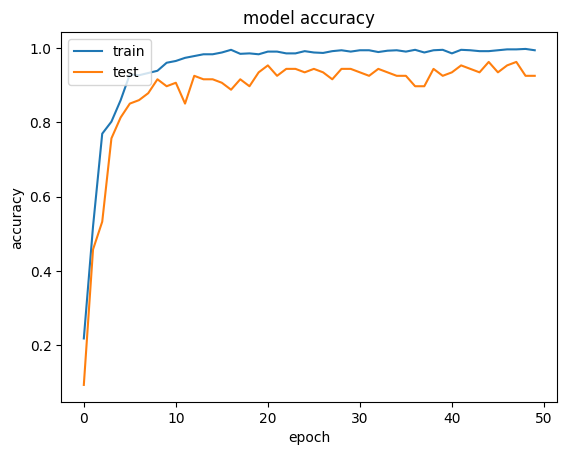

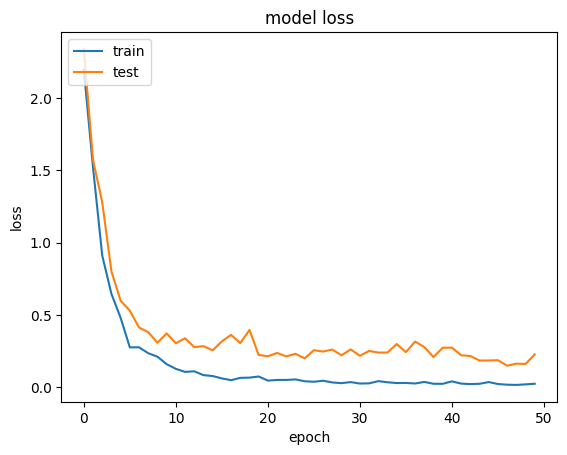

In [ ]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.show()

In [ ]:
test_path ='/content/drive/MyDrive/Data_100/testing'

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
test_set = test_datagen.flow_from_directory(test_path,
                                                 target_size = (299,299),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                            shuffle=False)

Found 107 images belonging to 10 classes.


In [ ]:
predicted_labels = model.predict(test_set)
predicted_labels = np.argmax(predicted_labels, axis=1)

4/4 [==============================] - 3s 224ms/step


In [ ]:
predicted_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 6, 6,
       6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9])

In [ ]:
true_labels=test_set.classes

In [ ]:
true_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 6, 6,
       6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9],
      dtype=int32)

In [ ]:
scores=model.evaluate(test_set)

4/4 [==============================] - 1s 202ms/step - loss: 0.0558 - accuracy: 0.9907


In [ ]:
class_names = list(train_data_dir.class_indices.keys())
class_names

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

1/1 [==============================] - 0s 103ms/step
Predicted class index: 0
Predicted class name: Tomato_Bacterial_spot
Time taken for prediction: 0.2301 seconds


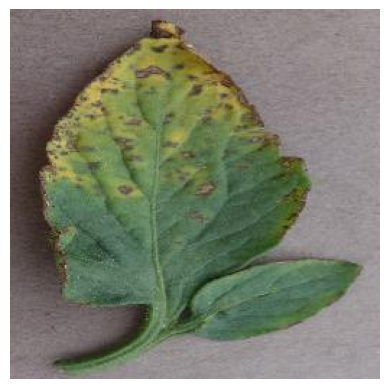

In [ ]:
import time
from tensorflow.keras.preprocessing import image

img_path = '/content/drive/MyDrive/Data_100/testing/Tomato_Bacterial_spot/1dbd6b67-25f1-444e-81d8-cbb54213cbb4___GCREC_Bact.Sp 3528.JPG'
img = image.load_img(img_path, target_size=(299, 299))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0
start_time = time.time()
predictions = model.predict(img_array)
end_time = time.time()
prediction_time = end_time - start_time
predicted_class_idx = np.argmax(predictions, axis=1)[0]
predicted_class_name = class_names[predicted_class_idx]
print(f"Predicted class index: {predicted_class_idx}")
print(f"Predicted class name: {predicted_class_name}")
print(f"Time taken for prediction: {prediction_time:.4f} seconds")
plt.imshow(image.load_img(img_path))
plt.axis('off')
plt.show()


In [ ]:
import tensorflow as tf
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [ ]:

def returnIndex(labels):
  for i in range(len(labels)):
      if(labels[i]==1):
        return i

1/1 [==============================] - 0s 25ms/step


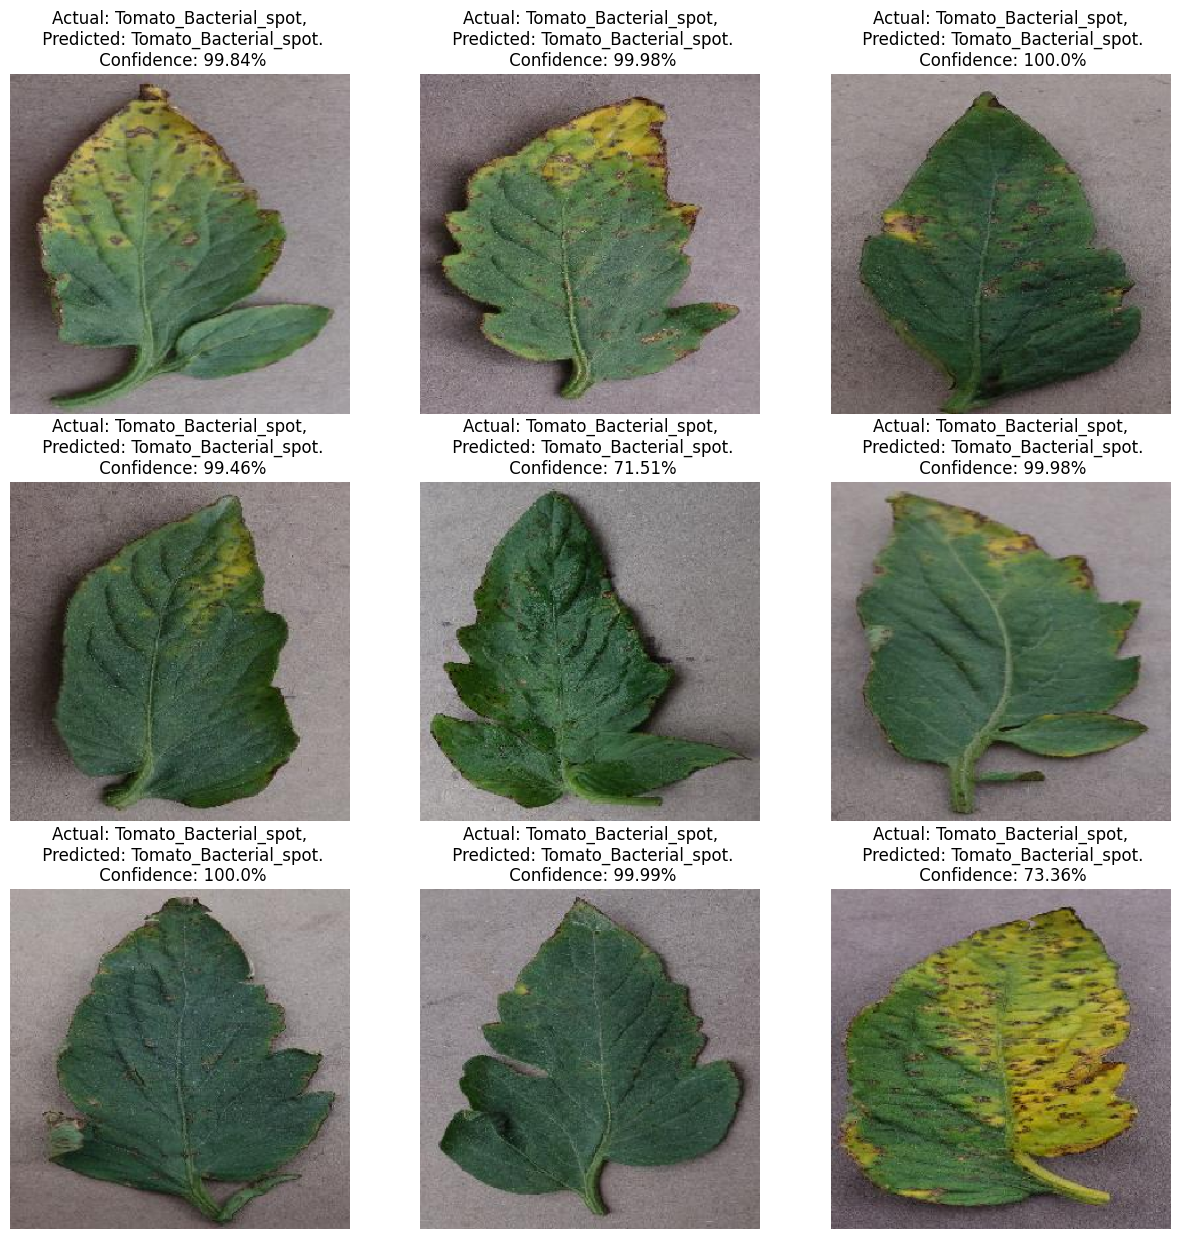

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_set:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])

        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[returnIndex(labels[i])]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")
    break

4/4 [==============================] - 1s 180ms/step
Confusion Matrix
Normalized confusion matrix
Classification Report
                                             precision    recall  f1-score   support

                      Tomato_Bacterial_spot       0.91      1.00      0.95        10
                        Tomato_Early_blight       1.00      1.00      1.00         8
                         Tomato_Late_blight       1.00      1.00      1.00        12
                           Tomato_Leaf_Mold       1.00      1.00      1.00        16
                  Tomato_Septoria_leaf_spot       1.00      0.91      0.95        11
Tomato_Spider_mites_Two_spotted_spider_mite       1.00      1.00      1.00         7
                        Tomato__Target_Spot       1.00      1.00      1.00         8
      Tomato__Tomato_YellowLeaf__Curl_Virus       1.00      1.00      1.00        10
                Tomato__Tomato_mosaic_virus       1.00      1.00      1.00        15
                             

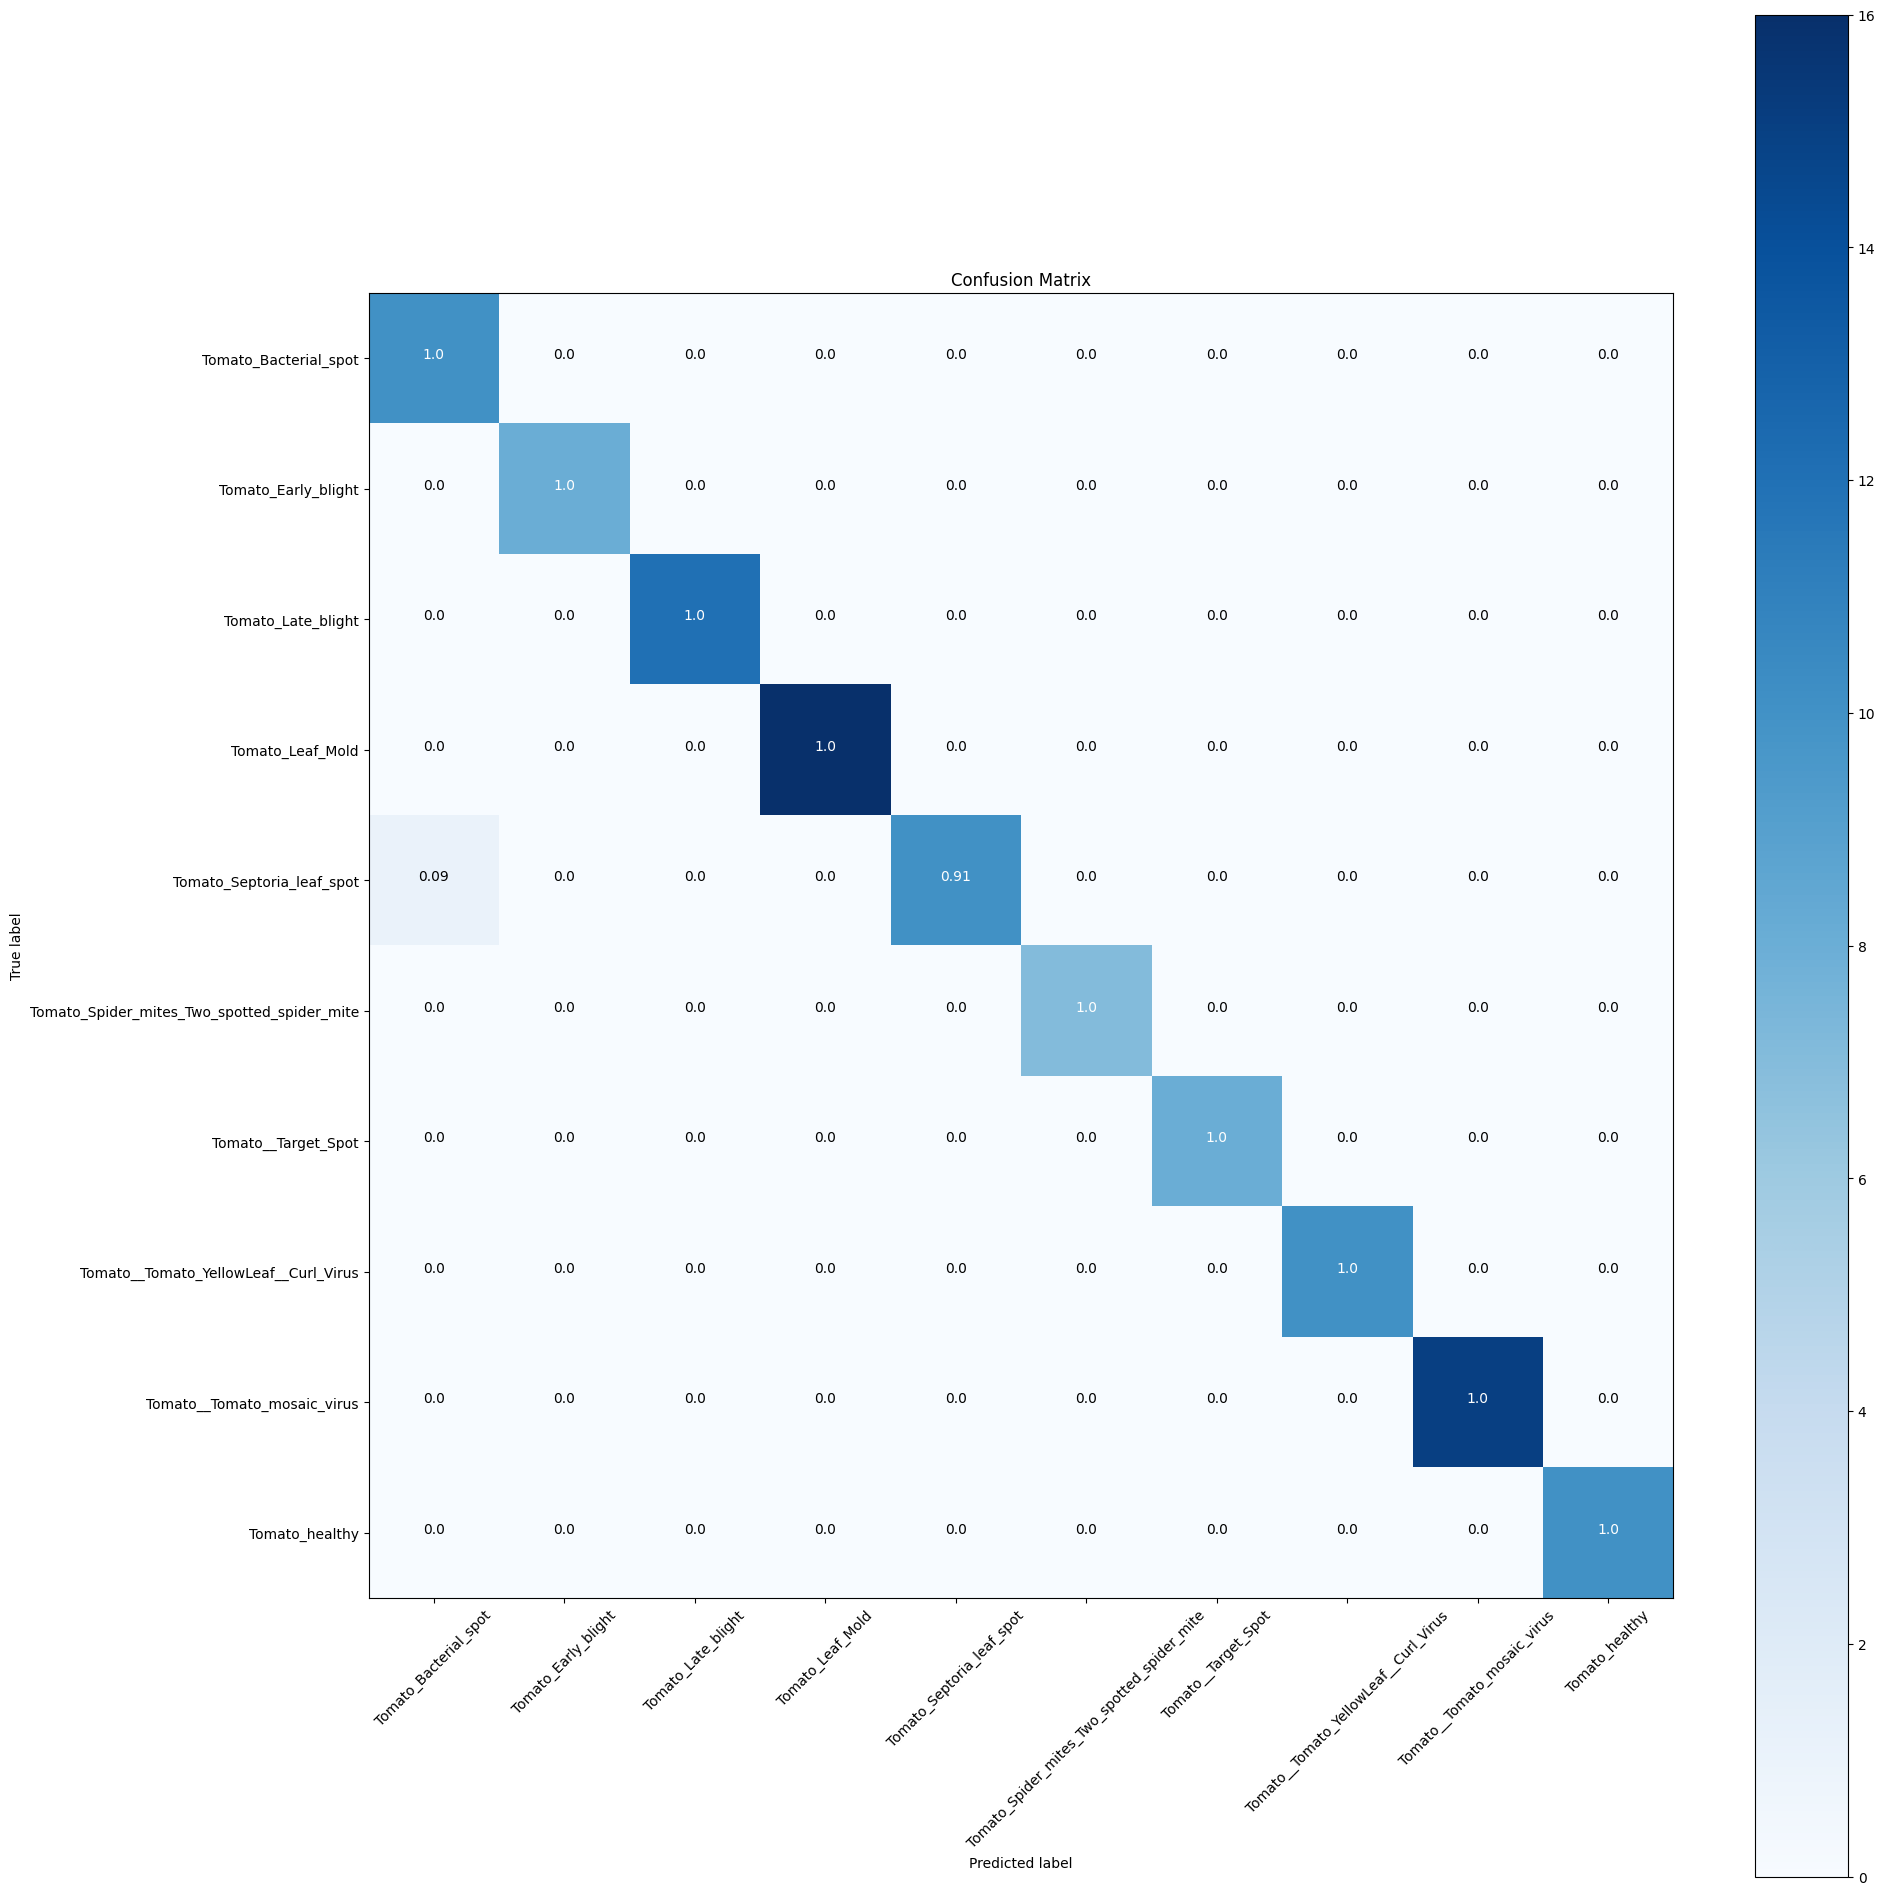

In [ ]:
#Plot the confusion matrix. Set Normalize = True/False
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(20,20))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
#Print the Target names
from sklearn.metrics import classification_report, confusion_matrix
import itertools
#shuffle=False
target_names = []
for key in train_data_dir.class_indices:
    target_names.append(key)
# print(target_names)
#Confusion Matrix
Y_pred = model.predict(test_set)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(test_set.classes, y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')
#Print Classification Report
print('Classification Report')
print(classification_report(test_set.classes, y_pred, target_names=target_names))